In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_glacier = pd.read_csv("/Users/sofiasuhinin/Desktop/RGI2000-v7.0-G-01_alaska-attributes.csv")

df_glacier = df_glacier.drop(columns=['aspect_sec','o1region','o2region','primeclass','is_rgi6', 'rgi_id', 'glims_id', 'src_date', 'dem_source', 'subm_id', 'utm_zone', 'conn_lvl', 'surge_type', 'glac_name'])
cols = df_glacier.columns.tolist()
print(cols)

['anlys_id', 'cenlon', 'cenlat', 'area_km2', 'term_type', 'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m', 'slope_deg', 'aspect_deg', 'lmax_m']


In [40]:
df_glacier

,anlys_id,cenlon,cenlat,area_km2,term_type,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,lmax_m
0,392889,-155.909404,67.413726,0.239199,9,-155.904032,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,725
1,392890,-155.879114,67.419232,0.104641,9,-155.878512,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,484
2,392897,-155.530786,67.431484,0.216605,9,-155.529516,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1099
3,392899,-155.501948,67.430514,0.252649,9,-155.502283,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,652
4,392901,-155.478173,67.432873,0.474716,9,-155.499392,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,419220,-127.943494,58.381563,0.190275,9,-127.940038,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,757
27505,419219,-127.994907,58.374932,0.230076,9,-127.986927,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,915
27506,419218,-128.003487,58.380406,0.187298,9,-128.006498,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,714
27507,419215,-128.146532,58.381816,0.152301,9,-128.140327,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,489


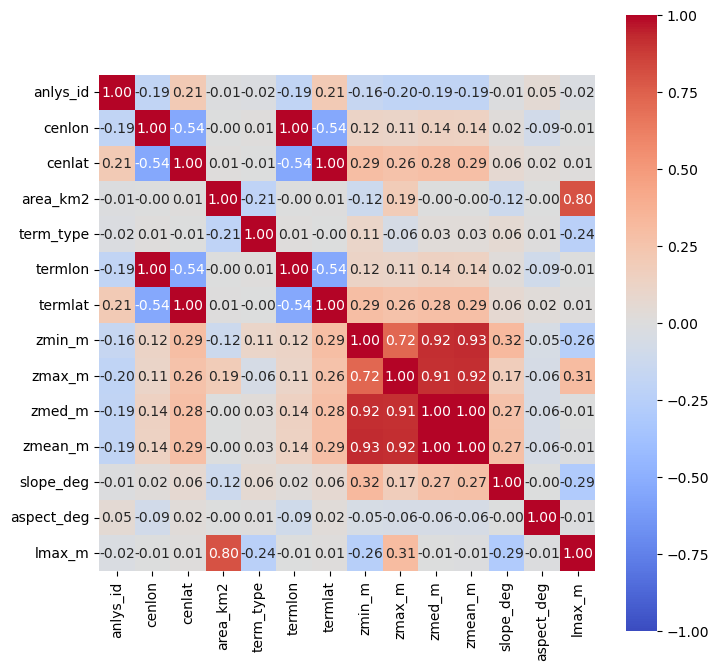

In [42]:
## Correlation coefficient matrix
corr_matrix = df_glacier.corr()


fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, ax=ax, square=True,
            )
plt.show()

Text(0, 0.5, 'zmean_m')

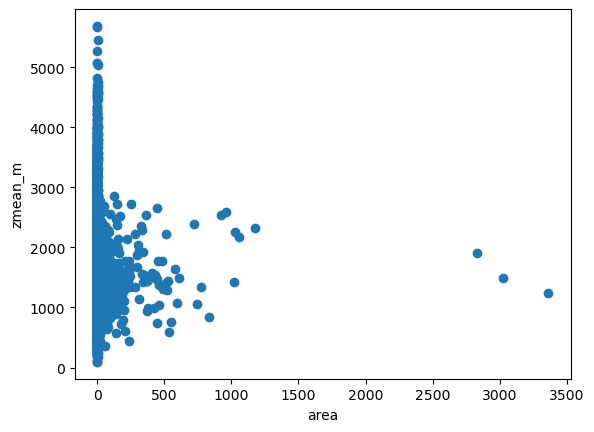

In [25]:
plt.scatter(df_glacier["area_km2"], df_glacier["zmean_m"])
plt.xlabel("area")
plt.ylabel("zmean_m")

In [ ]:
glacier_data[""]